In [2]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame 

import matplotlib.pyplot as plt 
import seaborn as sns
import itertools
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic' 
plt.rcParams["font.size"] = 10
%matplotlib inline 


from datetime import datetime, timedelta 
from statsmodels.tsa.arima_model import ARIMA 

from sklearn.preprocessing import StandardScaler
import os

In [67]:
test = pd.read_csv("data/TEST_DHweightDaconArima_NAFilled.csv")
train = pd.read_csv("data/TRAIN_DHweightDaconArima_NAFilled.csv")

In [68]:
train.Time = pd.to_datetime(train.Time)
test.Time = pd.to_datetime(test.Time)

In [5]:
traintest = pd.merge(train, test, on ='Time', how = 'outer')
traintest

Time      X692     X1272      X553     X1299      X598  \
0    2018-02-15 00:00:00  0.150000  0.392000  0.181000  0.237000  0.064000   
1    2018-02-15 01:00:00  0.422000  0.873000  0.502000  0.356000  0.160000   
2    2018-02-15 02:00:00  0.314000  0.440000  0.461000  0.308000  0.174000   
3    2018-02-15 03:00:00  0.309000  0.292000  0.524000  0.279000  0.198000   
4    2018-02-15 04:00:00  0.327000  0.298000  0.486000  0.364000  0.155000   
5    2018-02-15 05:00:00  0.303000  0.254000  0.514000  0.953000  0.198000   
6    2018-02-15 06:00:00  0.273000  0.290000  0.486000  0.547000  0.153000   
7    2018-02-15 07:00:00  0.798000  0.377000  0.506000  0.538000  0.222000   
8    2018-02-15 08:00:00  0.497000  0.247000  0.721000  0.529000  0.277000   
9    2018-02-15 09:00:00  0.428000  0.272000  0.397000  0.595000  0.381000   
10   2018-02-15 10:00:00  0.357000  0.257000  0.440000  0.492000  0.461000   
11   2018-02-15 11:00:00  0.387000  0.276000  0.426000  0.532000  0.265000   
12   2018-02-15 12:00:00  0.360000  0.277000  0.477000  0.351000  0.293000   
13   2018-02-15 13:00:00  0.333000  0.281000  0.432000  0.335000  0.255000   
14   2018-02-15 14:00:00  0.350000  0.257000  0.468000  0.298000  0.443000   
15   2018-02-15 15:00:00  0.751000  0.262000  0.427000  0.295000  0.462000   
16   2018-02-15 16:00:00  1.499000  0.260000  0.438000  0.278000  0.348000   
17   2018-02-15 17:00:00  1.339000  0.241000  0.414000  0.328000  0.192000   
18   2018-02-15 18:00:00  1.241000  0.267000  0.588000  0.277000  0.146000   
19   2018-02-15 19:00:00  0.741000  0.253000  0.708000  0.359000  0.138000   
20   2018-02-15 20:00:00  0.226000  0.088000  0.313000  0.234000  0.062000   
21   2018-02-15 21:00:00  0.470000  0.250000  0.779000  0.591000  0.131000   
22   2018-02-15 22:00:00  0.188429  0.179294  0.342936  0.267831  0.150000   
23   2018-02-15 23:00:00  0.178571  0.168706  0.292064  0.247169  0.261125   
24   2018-02-16 00:00:00  0.156000  0.118000  0.189000  0.153000  0.188000   
25   2018-02-16 01:00:00  0.317000  0.264000  0.536000  0.381000  0.271000   
26   2018-02-16 02:00:00  0.298000  0.323000  0.407000  0.381000  0.251000   
27   2018-02-16 03:00:00  0.335000  0.265000  0.488000  0.193000  0.258000   
28   2018-02-16 04:00:00  0.356000  0.256000  0.412000  0.165000  0.164000   
29   2018-02-16 05:00:00  0.308000  0.302000  0.419000  0.175000  0.169000   
...                  ...       ...       ...       ...       ...       ...   
7304 2018-06-16 20:00:00       NaN       NaN       NaN       NaN       NaN   
7305 2018-06-16 21:00:00       NaN       NaN       NaN       NaN       NaN   
7306 2018-06-16 22:00:00       NaN       NaN       NaN       NaN       NaN   
7307 2018-06-16 23:00:00       NaN       NaN       NaN       NaN       NaN   
7308 2018-06-17 01:00:00       NaN       NaN       NaN       NaN       NaN   
7309 2018-06-17 02:00:00       NaN       NaN       NaN       NaN       NaN   
7310 2018-06-17 03:00:00       NaN       NaN       NaN       NaN       NaN   
7311 2018-06-17 04:00:00       NaN       NaN       NaN       NaN       NaN   
7312 2018-06-17 05:00:00       NaN       NaN       NaN       NaN       NaN   
7313 2018-06-17 06:00:00       NaN       NaN       NaN       NaN       NaN   
7314 2018-06-17 07:00:00       NaN       NaN       NaN       NaN       NaN   
7315 2018-06-17 08:00:00       NaN       NaN       NaN       NaN       NaN   
7316 2018-06-17 09:00:00       NaN       NaN       NaN       NaN       NaN   
7317 2018-06-17 10:00:00       NaN       NaN       NaN       NaN       NaN   
7318 2018-06-17 11:00:00       NaN       NaN       NaN       NaN       NaN   
7319 2018-06-17 12:00:00       NaN       NaN       NaN       NaN       NaN   
7320 2018-06-17 13:00:00       NaN       NaN       NaN       NaN       NaN   
7321 2018-06-17 14:00:00       NaN       NaN       NaN       NaN       NaN   
7322 2018-06-17 15:00:00       NaN       NaN       NaN       NaN       NaN   
7323 2018-06-17 16:00:00       NaN       N

In [ ]:
traintest.iloc[:, ]

In [6]:
traintest2 = traintest.copy()
traintest2 = pd.melt(traintest2, id_vars=['Time'])
traintest2.tail()

Time variable     value
10934989 2018-06-17 22:00:00     X230  0.296677
10934990 2018-06-17 23:00:00     X230  0.296678
10934991 2018-06-29 00:00:00     X230  0.302759
10934992 2018-06-30 00:00:00     X230  0.302759
10934993 2018-06-30 01:00:00     X230  0.299449

In [7]:
traintest3 = traintest2.copy()

In [8]:
# train4 = train3.groupby(['Time','variable'])['value'].agg({'value':'mean'}).reset_index()
# train4.head(2)

In [9]:
# train5 = train4.copy()
traintest3['lag1d'] = traintest3.groupby(['variable'])['value'].shift(24)
traintest3['lag7d'] = traintest3.groupby(['variable'])['value'].shift(168)
traintest3 = traintest3.fillna(0)
traintest3['ratio1d'] = traintest3['value']/(traintest3['lag1d']+1)
traintest3['ratio7d'] = traintest3['value']/(traintest3['lag7d']+1)
traintest3.head(2)

Time variable  value  lag1d  lag7d  ratio1d  ratio7d
0 2018-02-15 00:00:00     X692  0.150    0.0    0.0    0.150    0.150
1 2018-02-15 01:00:00     X692  0.422    0.0    0.0    0.422    0.422

In [10]:
traintest3.tail(2)

Time variable     value     lag1d  lag7d   ratio1d  \
10934992 2018-06-30 00:00:00     X230  0.302759  0.299449  0.598  0.232990   
10934993 2018-06-30 01:00:00     X230  0.299449  0.297936  0.579  0.230712   

           ratio7d  
10934992  0.189461  
10934993  0.189645

In [11]:
traintest4 = traintest3.groupby(['variable']).agg({'ratio1d':'mean','ratio7d':'mean'}).reset_index()
featureTT = traintest4.copy()

In [12]:
traintest4.head(2)

variable   ratio1d   ratio7d
0      X10  0.760198  0.797132
1     X100  0.192117  0.200757

In [14]:
# featureTT['id'] = [int(s[1:]) for s in featureTT['variable']]
# featureTT2 = featureTT.iloc[:, 1:]
featureTT2 = featureTT.set_index('variable')

In [15]:
featureTT2.head()

ratio1d   ratio7d
variable                    
X10       0.760198  0.797132
X100      0.192117  0.200757
X1000     0.143647  0.147312
X1001     0.175597  0.182920
X1002     0.124822  0.127639

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

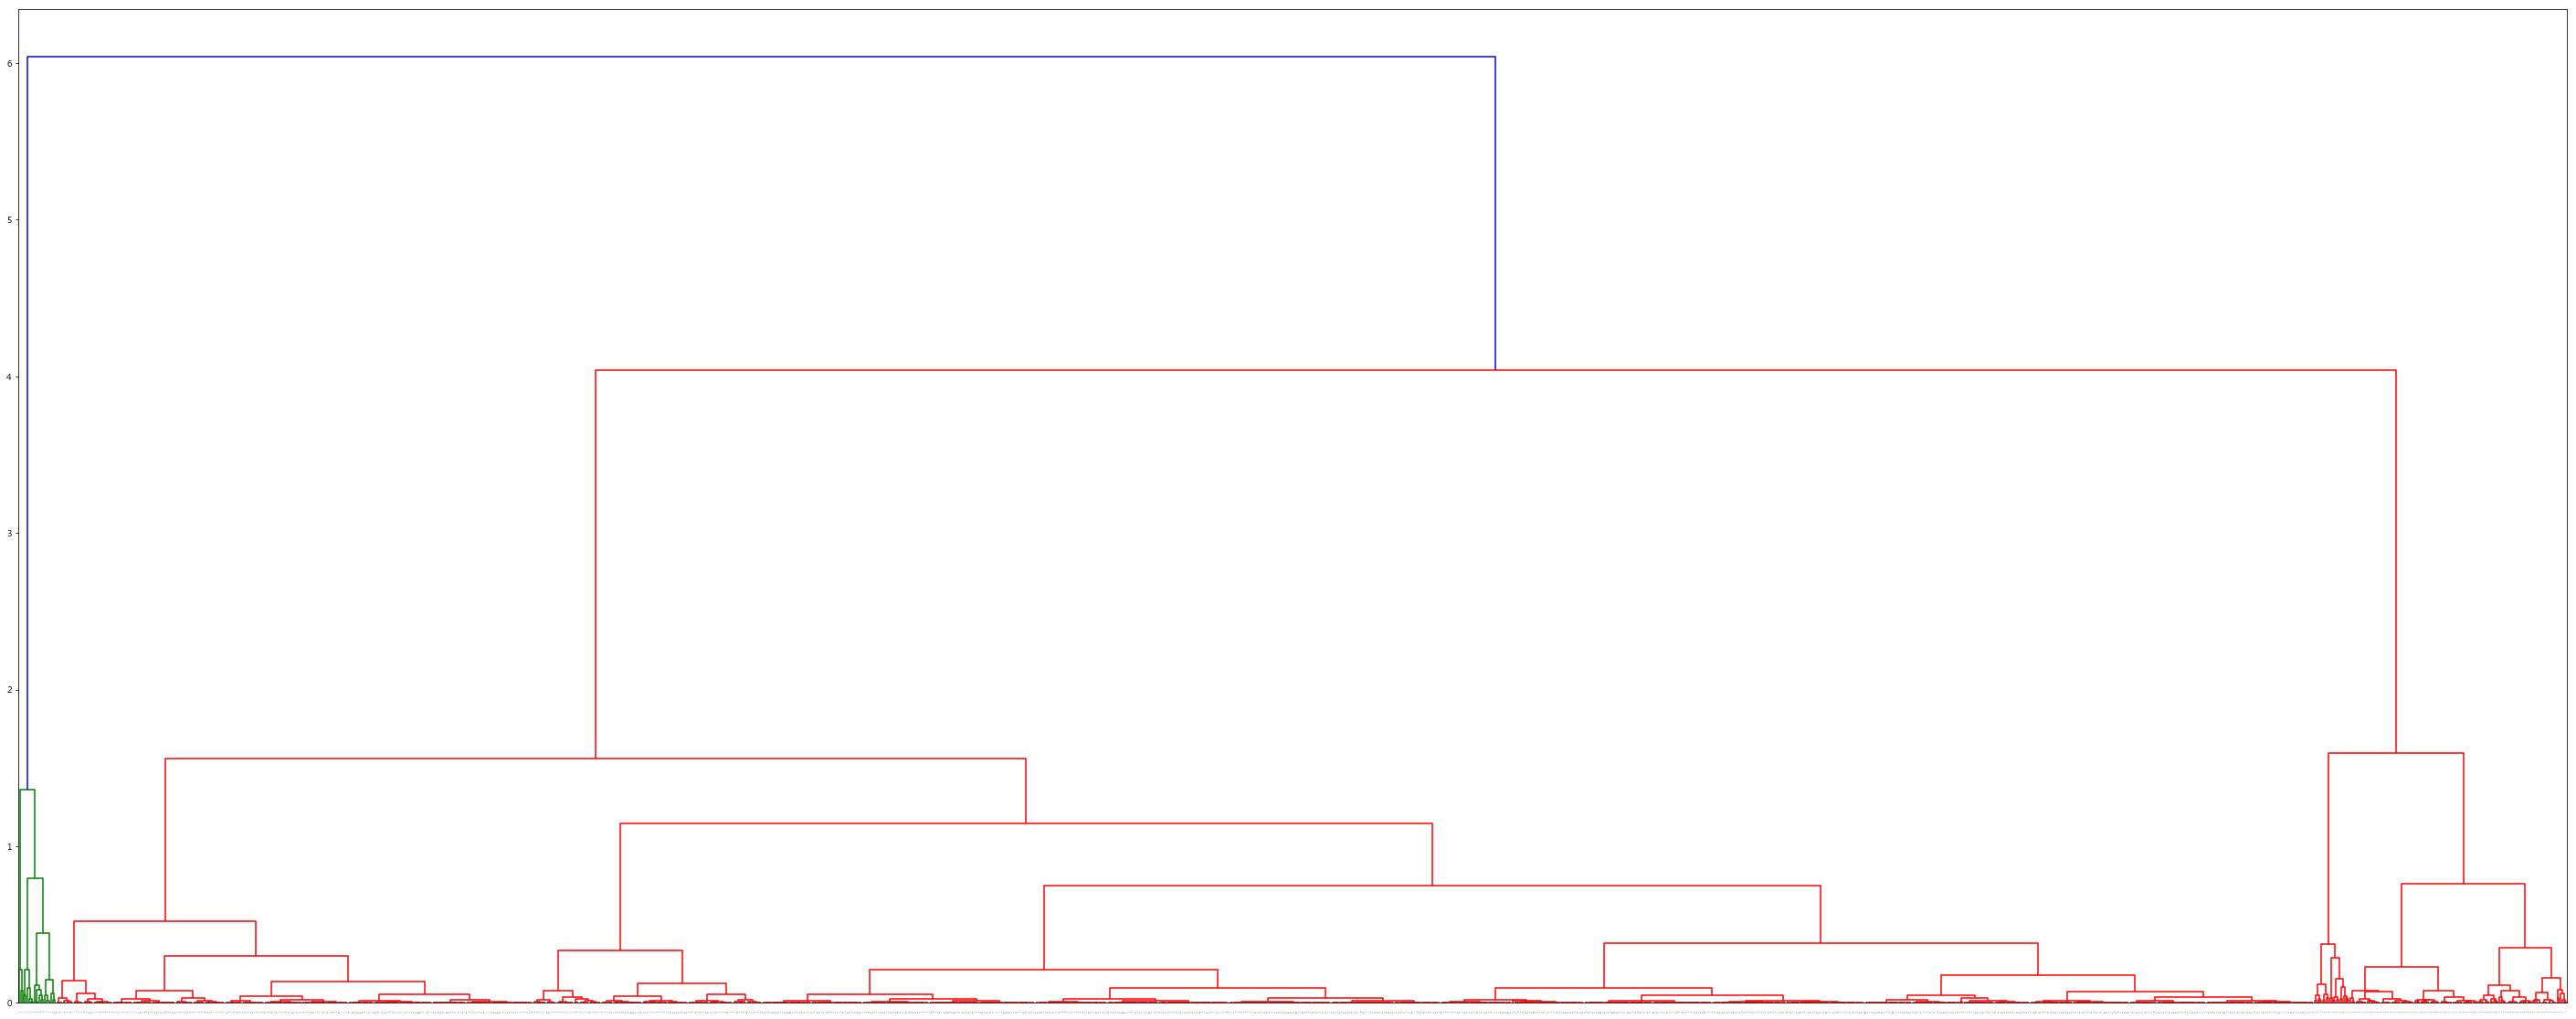

In [18]:
Z = linkage(featureTT2,'ward')

plt.figure(figsize=(50,20))
dendrogram(Z,
           leaf_rotation=100,
           leaf_font_size=1, 
           labels=featureTT2.index)
plt.show()

In [19]:
k=3
featureTT3 = featureTT2.copy()

predict = fcluster(Z, k, criterion = 'maxclust')
featureTT3['cluster']=predict
traintest4 = pd.merge(traintest3, featureTT3, on ='variable',how='left')

c_1T = traintest4[traintest4['cluster']==1]
c_2T = traintest4[traintest4['cluster']==2]
c_3T = traintest4[traintest4['cluster']==3]
c_4T = traintest4[traintest4['cluster']==4]
c_5T = traintest4[traintest4['cluster']==5]

In [20]:
traintest4

Time variable     value     lag1d  lag7d  ratio1d_x  \
0        2018-02-15 00:00:00     X692  0.150000  0.000000  0.000   0.150000   
1        2018-02-15 01:00:00     X692  0.422000  0.000000  0.000   0.422000   
2        2018-02-15 02:00:00     X692  0.314000  0.000000  0.000   0.314000   
3        2018-02-15 03:00:00     X692  0.309000  0.000000  0.000   0.309000   
4        2018-02-15 04:00:00     X692  0.327000  0.000000  0.000   0.327000   
5        2018-02-15 05:00:00     X692  0.303000  0.000000  0.000   0.303000   
6        2018-02-15 06:00:00     X692  0.273000  0.000000  0.000   0.273000   
7        2018-02-15 07:00:00     X692  0.798000  0.000000  0.000   0.798000   
8        2018-02-15 08:00:00     X692  0.497000  0.000000  0.000   0.497000   
9        2018-02-15 09:00:00     X692  0.428000  0.000000  0.000   0.428000   
10       2018-02-15 10:00:00     X692  0.357000  0.000000  0.000   0.357000   
11       2018-02-15 11:00:00     X692  0.387000  0.000000  0.000   0.387000   
12       2018-02-15 12:00:00     X692  0.360000  0.000000  0.000   0.360000   
13       2018-02-15 13:00:00     X692  0.333000  0.000000  0.000   0.333000   
14       2018-02-15 14:00:00     X692  0.350000  0.000000  0.000   0.350000   
15       2018-02-15 15:00:00     X692  0.751000  0.000000  0.000   0.751000   
16       2018-02-15 16:00:00     X692  1.499000  0.000000  0.000   1.499000   
17       2018-02-15 17:00:00     X692  1.339000  0.000000  0.000   1.339000   
18       2018-02-15 18:00:00     X692  1.241000  0.000000  0.000   1.241000   
19       2018-02-15 19:00:00     X692  0.741000  0.000000  0.000   0.741000   
20       2018-02-15 20:00:00     X692  0.226000  0.000000  0.000   0.226000   
21       2018-02-15 21:00:00     X692  0.470000  0.000000  0.000   0.470000   
22       2018-02-15 22:00:00     X692  0.188429  0.000000  0.000   0.188429   
23       2018-02-15 23:00:00     X692  0.178571  0.000000  0.000   0.178571   
24       2018-02-16 00:00:00     X692  0.156000  0.150000  0.000   0.135652   
25       2018-02-16 01:00:00     X692  0.317000  0.422000  0.000   0.222925   
26       2018-02-16 02:00:00     X692  0.298000  0.314000  0.000   0.226788   
27       2018-02-16 03:00:00     X692  0.335000  0.309000  0.000   0.255921   
28       2018-02-16 04:00:00     X692  0.356000  0.327000  0.000   0.268274   
29       2018-02-16 05:00:00     X692  0.308000  0.303000  0.000   0.236378   
...                      ...      ...       ...       ...    ...        ...   
10934964 2018-06-16 20:00:00     X230  0.296676  0.296677  0.405   0.228797   
10934965 2018-06-16 21:00:00     X230  0.296677  0.296677  0.392   0.228798   
10934966 2018-06-16 22:00:00     X230  0.296677  0.296678  0.352   0.228798   
10934967 2018-06-16 23:00:00     X230  0.296678  0.302759  0.347   0.227731   
10934968 2018-06-17 01:00:00     X230  0.299449  0.299449  0.552   0.230443   
10934969 2018-06-17 02:00:00     X230  0.297936  0.297936  0.420   0.229546   
10934970 2018-06-17 03:00:00     X230  0.297245  0.297245  0.485   0.229136   
10934971 2018-06-17 04:00:00     X230  0.296929  0.296929  0.444   0.228948   
10934972 2018-06-17 05:00:00     X230  0.296786  0.296786  0.428   0.228863   
10934973 2018-06-17 06:00:00     X230  0.296720  0.296720  0.432   0.228824   
10934974 2018-06-17 07:00:00     X230  0.296691  0.296691  0.390   0.228806   
10934975 2018-06-17 08:00:00     X230  0.296678  0.296678  0.389   0.228798   
10934976 2018-06-17 09:00:00     X230  0.296672  0.296672  0.388   0.228795   
10934977 2018-06-17 10:00:00     X230  0.296670  0.296670  0.376   0.228794   
10934978 2018-06-17 11:00:00     X230  0.296670  0.296670  0.635   0.228794   
10934979 2018-06-17 12:00:00     X230  0.296670  0.296670  0.651   0.228794   
10934980 2018-06-17 13:00:00     X230  0.296670  0.296670  0.377   0.228794   
10934981 2018-06-17 14:00:00     X230  0.296671  0.296671  0.464   0.228794   
10934982 2018-06-17 15:00:00     X230  0.296672  0.296672  0.474   0.22879

In [48]:
c_1T

Time variable     value     lag1d  lag7d  ratio1d_x  \
9468194  2018-02-15 00:00:00      X26  1.088616  0.000000  0.000   1.088616   
9468195  2018-02-15 01:00:00      X26  1.187378  0.000000  0.000   1.187378   
9468196  2018-02-15 02:00:00      X26  1.260810  0.000000  0.000   1.260810   
9468197  2018-02-15 03:00:00      X26  1.315409  0.000000  0.000   1.315409   
9468198  2018-02-15 04:00:00      X26  1.356003  0.000000  0.000   1.356003   
9468199  2018-02-15 05:00:00      X26  1.386187  0.000000  0.000   1.386187   
9468200  2018-02-15 06:00:00      X26  1.408628  0.000000  0.000   1.408628   
9468201  2018-02-15 07:00:00      X26  1.425314  0.000000  0.000   1.425314   
9468202  2018-02-15 08:00:00      X26  1.437721  0.000000  0.000   1.437721   
9468203  2018-02-15 09:00:00      X26  1.446945  0.000000  0.000   1.446945   
9468204  2018-02-15 10:00:00      X26  1.453803  0.000000  0.000   1.453803   
9468205  2018-02-15 11:00:00      X26  1.458903  0.000000  0.000   1.458903   
9468206  2018-02-15 12:00:00      X26  1.462694  0.000000  0.000   1.462694   
9468207  2018-02-15 13:00:00      X26  1.465513  0.000000  0.000   1.465513   
9468208  2018-02-15 14:00:00      X26  1.467609  0.000000  0.000   1.467609   
9468209  2018-02-15 15:00:00      X26  1.469168  0.000000  0.000   1.469168   
9468210  2018-02-15 16:00:00      X26  1.470327  0.000000  0.000   1.470327   
9468211  2018-02-15 17:00:00      X26  1.471188  0.000000  0.000   1.471188   
9468212  2018-02-15 18:00:00      X26  1.471829  0.000000  0.000   1.471829   
9468213  2018-02-15 19:00:00      X26  1.472305  0.000000  0.000   1.472305   
9468214  2018-02-15 20:00:00      X26  1.472659  0.000000  0.000   1.472659   
9468215  2018-02-15 21:00:00      X26  1.472922  0.000000  0.000   1.472922   
9468216  2018-02-15 22:00:00      X26  1.473118  0.000000  0.000   1.473118   
9468217  2018-02-15 23:00:00      X26  1.473264  0.000000  0.000   1.473264   
9468218  2018-02-16 00:00:00      X26  1.088616  1.088616  0.000   0.521214   
9468219  2018-02-16 01:00:00      X26  1.187378  1.187378  0.000   0.542832   
9468220  2018-02-16 02:00:00      X26  1.260810  1.260810  0.000   0.557681   
9468221  2018-02-16 03:00:00      X26  1.315409  1.315409  0.000   0.568111   
9468222  2018-02-16 04:00:00      X26  1.356003  1.356003  0.000   0.575552   
9468223  2018-02-16 05:00:00      X26  1.386187  1.386187  0.000   0.580921   
...                      ...      ...       ...       ...    ...        ...   
10920296 2018-06-16 20:00:00      X75  3.304000  1.330000  6.234   1.418026   
10920297 2018-06-16 21:00:00      X75  3.304000  0.325000  2.746   2.493585   
10920298 2018-06-16 22:00:00      X75  3.304000  0.306000  5.999   2.529862   
10920299 2018-06-16 23:00:00      X75  3.304000  1.142000  9.640   1.542484   
10920300 2018-06-17 01:00:00      X75  3.177000  1.754000  5.070   1.153595   
10920301 2018-06-17 02:00:00      X75  3.177000  1.597000  0.154   1.223335   
10920302 2018-06-17 03:00:00      X75  3.177000  2.138000  3.735   1.012428   
10920303 2018-06-17 04:00:00      X75  3.177000  3.088000  4.125   0.777153   
10920304 2018-06-17 05:00:00      X75  3.177000  3.075000  2.702   0.779632   
10920305 2018-06-17 06:00:00      X75  3.177000  2.233000  0.176   0.982679   
10920306 2018-06-17 07:00:00      X75  3.177000  1.368000  0.179   1.341639   
10920307 2018-06-17 08:00:00      X75  3.177000  1.424000  0.176   1.310644   
10920308 2018-06-17 09:00:00      X75  3.177000  0.765000  0.192   1.800000   
10920309 2018-06-17 10:00:00      X75  3.177000  0.230000  0.172   2.582927   
10920310 2018-06-17 11:00:00      X75  3.177000  0.245000  0.197   2.551807   
10920311 2018-06-17 12:00:00      X75  3.177000  0.221000  0.178   2.601966   
10920312 2018-06-17 13:00:00      X75  3.177000  0.226000  0.172   2.591354   
10920313 2018-06-17 14:00:00      X75  3.177000  0.374000  0.181   2.312227   
10920314 2018-06-17 15:00:00      X75  3.177000  1.635000  0.174   1.20569

In [21]:
cnt_srs_1T = c_1T.groupby('Time')['value'].mean()
cnt_srs_2T = c_2T.groupby('Time')['value'].mean()
cnt_srs_3T = c_3T.groupby('Time')['value'].mean()
cnt_srs_4T = c_4T.groupby('Time')['value'].mean()
cnt_srs_5T = c_4T.groupby('Time')['value'].mean()

In [22]:
import plotly.graph_objs as go
def scatter_plot(cnt_srs, color, showlegend1=False, name1 = ""):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        name = name1,
        showlegend=showlegend1,
        marker=dict(
            color=color,
        ),
    )
    return trace

In [23]:
trace_1T = scatter_plot(cnt_srs_1T, 'yellow', True ,'Cluster_1')
trace_2T = scatter_plot(cnt_srs_2T, 'green', True ,'Cluster_2')
trace_3T = scatter_plot(cnt_srs_3T, 'red', True ,'Cluster_3')
trace_4T = scatter_plot(cnt_srs_4T, 'grey', True ,'Cluster_4')
trace_5T = scatter_plot(cnt_srs_5T, 'white', True ,'Cluster_5')

In [66]:
c_1T.tail(30)

Time variable  value  lag1d  lag7d  ratio1d_x  \
10920296 2018-06-16 20:00:00      X75  3.304  1.330  6.234   1.418026   
10920297 2018-06-16 21:00:00      X75  3.304  0.325  2.746   2.493585   
10920298 2018-06-16 22:00:00      X75  3.304  0.306  5.999   2.529862   
10920299 2018-06-16 23:00:00      X75  3.304  1.142  9.640   1.542484   
10920300 2018-06-17 01:00:00      X75  3.177  1.754  5.070   1.153595   
10920301 2018-06-17 02:00:00      X75  3.177  1.597  0.154   1.223335   
10920302 2018-06-17 03:00:00      X75  3.177  2.138  3.735   1.012428   
10920303 2018-06-17 04:00:00      X75  3.177  3.088  4.125   0.777153   
10920304 2018-06-17 05:00:00      X75  3.177  3.075  2.702   0.779632   
10920305 2018-06-17 06:00:00      X75  3.177  2.233  0.176   0.982679   
10920306 2018-06-17 07:00:00      X75  3.177  1.368  0.179   1.341639   
10920307 2018-06-17 08:00:00      X75  3.177  1.424  0.176   1.310644   
10920308 2018-06-17 09:00:00      X75  3.177  0.765  0.192   1.800000   
10920309 2018-06-17 10:00:00      X75  3.177  0.230  0.172   2.582927   
10920310 2018-06-17 11:00:00      X75  3.177  0.245  0.197   2.551807   
10920311 2018-06-17 12:00:00      X75  3.177  0.221  0.178   2.601966   
10920312 2018-06-17 13:00:00      X75  3.177  0.226  0.172   2.591354   
10920313 2018-06-17 14:00:00      X75  3.177  0.374  0.181   2.312227   
10920314 2018-06-17 15:00:00      X75  3.177  1.635  0.174   1.205693   
10920315 2018-06-17 16:00:00      X75  3.177  0.309  0.189   2.427044   
10920316 2018-06-17 17:00:00      X75  3.177  0.194  1.347   2.660804   
10920317 2018-06-17 18:00:00      X75  3.177  0.224  3.209   2.595588   
10920318 2018-06-17 19:00:00      X75  3.177  3.304  3.286   0.738151   
10920319 2018-06-17 20:00:00      X75  3.177  3.304  3.319   0.738151   
10920320 2018-06-17 21:00:00      X75  3.177  3.304  2.097   0.738151   
10920321 2018-06-17 22:00:00      X75  3.177  3.304  2.421   0.738151   
10920322 2018-06-17 23:00:00      X75  3.177  3.304  1.834   0.738151   
10920323 2018-06-29 00:00:00      X75  0.245  3.304  1.761   0.056924   
10920324 2018-06-30 00:00:00      X75  0.247  3.177  1.079   0.059133   
10920325 2018-06-30 01:00:00      X75  0.157  3.177  0.268   0.037587   

          ratio7d_x  ratio1d_y  ratio7d_y  cluster  
10920296   0.456732   0.676018   0.597009        1  
10920297   0.882007   0.676018   0.597009        1  
10920298   0.472067   0.676018   0.597009        1  
10920299   0.310526   0.676018   0.597009        1  
10920300   0.523394   0.676018   0.597009        1  
10920301   2.753033   0.676018   0.597009        1  
10920302   0.670961   0.676018   0.597009        1  
10920303   0.619902   0.676018   0.597009        1  
10920304   0.858185   0.676018   0.597009        1  
10920305   2.701531   0.676018   0.597009        1  
10920306   2.694656   0.676018   0.597009        1  
10920307   2.701531   0.676018   0.597009        1  
10920308   2.665268   0.676018   0.597009        1  
10920309   2.710751   0.676018   0.597009        1  
10920310   2.654135   0.676018   0.597009        1  
10920311   2.696944   0.676018   0.597009        1  
10920312   2.710751   0.676018   0.597009        1  
10920313   2.690093   0.676018   0.597009        1  
10920314   2.706133   0.676018   0.597009        1  
10920315   2.671993   0.676018   0.597009        1  
10920316   1.353643   0.676018   0.597009        1  
10920317   0.754811   0.676018   0.597009        1  
10920318   0.741251   0.676018   0.597009        1  
10920319   0.735587   0.676018   0.597009        1  
10920320   1.025831   0.676018   0.597009        1  
10920321   0.928676   0.676018   0.597009        1  
10920322   1.121030   0.676018   0.597009        1  
10920323   0.088736   0.676018   0.597009        1  
10920324   0.118807   0.676018   0.597009        1  
10920325   0.123817   0.676018   0.597009        1

In [55]:
c_1T.groupby('Time')['value'].mean()

Time
2017-08-29 10:00:00    3.896636
2017-08-29 11:00:00    3.886230
2017-08-29 12:00:00    3.877867
2017-08-29 13:00:00    3.871161
2017-08-29 14:00:00    3.865797
2017-08-29 15:00:00    3.861518
2017-08-29 16:00:00    3.858115
2017-08-29 17:00:00    3.855419
2017-08-29 18:00:00    3.853292
2017-08-29 19:00:00    3.851625
2017-08-29 20:00:00    3.850325
2017-08-29 21:00:00    3.849322
2017-08-29 22:00:00    3.848555
2017-08-29 23:00:00    3.847979
2017-08-30 00:00:00    4.309461
2017-08-30 01:00:00    4.216510
2017-08-30 02:00:00    4.143265
2017-08-30 03:00:00    4.084928
2017-08-30 04:00:00    4.038139
2017-08-30 05:00:00    4.000453
2017-08-30 06:00:00    3.970031
2017-08-30 07:00:00    3.945451
2017-08-30 08:00:00    3.925594
2017-08-30 09:00:00    3.909563
2017-08-30 10:00:00    3.896636
2017-08-30 11:00:00    3.886230
2017-08-30 12:00:00    3.877867
2017-08-30 13:00:00    3.871161
2017-08-30 14:00:00    3.865797
2017-08-30 15:00:00    3.861518
                         ...   
201

In [53]:
cnt_srs_1T

Time
2017-08-29 10:00:00    3.896636
2017-08-29 11:00:00    3.886230
2017-08-29 12:00:00    3.877867
2017-08-29 13:00:00    3.871161
2017-08-29 14:00:00    3.865797
2017-08-29 15:00:00    3.861518
2017-08-29 16:00:00    3.858115
2017-08-29 17:00:00    3.855419
2017-08-29 18:00:00    3.853292
2017-08-29 19:00:00    3.851625
2017-08-29 20:00:00    3.850325
2017-08-29 21:00:00    3.849322
2017-08-29 22:00:00    3.848555
2017-08-29 23:00:00    3.847979
2017-08-30 00:00:00    4.309461
2017-08-30 01:00:00    4.216510
2017-08-30 02:00:00    4.143265
2017-08-30 03:00:00    4.084928
2017-08-30 04:00:00    4.038139
2017-08-30 05:00:00    4.000453
2017-08-30 06:00:00    3.970031
2017-08-30 07:00:00    3.945451
2017-08-30 08:00:00    3.925594
2017-08-30 09:00:00    3.909563
2017-08-30 10:00:00    3.896636
2017-08-30 11:00:00    3.886230
2017-08-30 12:00:00    3.877867
2017-08-30 13:00:00    3.871161
2017-08-30 14:00:00    3.865797
2017-08-30 15:00:00    3.861518
                         ...   
201

In [24]:
import plotly.offline as py
layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='Train Clustering_3'
)

data = [trace_1T,trace_2T, trace_3T]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

In [26]:
traintest4.groupby('cluster')['variable'].nunique()


cluster
1      22
2    1321
3     148
Name: variable, dtype: int64

In [33]:
# TEST에서 각각의 클러스터에 해당하는 ID 추출
c1_testID = np.unique(traintest4[traintest4.cluster==1]['variable'])
c2_testID = np.unique(traintest4[traintest4.cluster==2]['variable'])
c3_testID = np.unique(traintest4[traintest4.cluster==3]['variable'])

print(c1_testID,'\n',c2_testID,'\n', c3_testID)

['X10' 'X102' 'X124' 'X16' 'X18' 'X26' 'X30' 'X37' 'X41' 'X42' 'X44' 'X5'
 'X50' 'X51' 'X55' 'X59' 'X61' 'X68' 'X7' 'X75' 'X80' 'X87'] 
 ['X100' 'X1000' 'X1001' ... 'X997' 'X998' 'X999'] 
 ['X103' 'X104' 'X105' 'X106' 'X107' 'X11' 'X110' 'X111' 'X113' 'X116'
 'X119' 'X12' 'X120' 'X123' 'X125' 'X130' 'X132' 'X133' 'X134' 'X139'
 'X140' 'X142' 'X148' 'X1486' 'X149' 'X15' 'X155' 'X158' 'X160' 'X161'
 'X163' 'X165' 'X166' 'X175' 'X176' 'X177' 'X178' 'X192' 'X195' 'X196'
 'X2' 'X20' 'X201' 'X205' 'X206' 'X211' 'X213' 'X214' 'X215' 'X217' 'X218'
 'X223' 'X225' 'X228' 'X229' 'X23' 'X230' 'X232' 'X233' 'X241' 'X242'
 'X243' 'X245' 'X247' 'X250' 'X252' 'X253' 'X254' 'X255' 'X260' 'X262'
 'X263' 'X266' 'X269' 'X27' 'X270' 'X271' 'X275' 'X28' 'X282' 'X286'
 'X289' 'X300' 'X303' 'X305' 'X308' 'X31' 'X315' 'X32' 'X33' 'X330' 'X331'
 'X337' 'X350' 'X357' 'X36' 'X363' 'X368' 'X371' 'X376' 'X378' 'X379'
 'X386' 'X389' 'X393' 'X397' 'X40' 'X402' 'X406' 'X407' 'X408' 'X421'
 'X422' 'X426' 'X427' 'X43' '

In [34]:
test_cluster1 = [a for a in c1_testID if a in test.columns]

In [35]:
test_cluster2 = [a for a in c2_testID if a in test.columns]

In [36]:
test_cluster3 = [a for a in c3_testID if a in test.columns]

In [37]:
train_cluster1 = [a for a in c1_testID if a in train.columns]

In [38]:
train_cluster2 = [a for a in c2_testID if a in train.columns]

In [39]:
train_cluster3 = [a for a in c3_testID if a in train.columns]

In [40]:
len(test_cluster1), len(test_cluster2), len(test_cluster3)

(22, 64, 114)

In [41]:
len(train_cluster1), len(train_cluster2), len(train_cluster3)

(0, 1257, 34)

In [46]:
clusterIDs = pd.DataFrame([test_cluster1, test_cluster2, test_cluster3,
                          train_cluster1, train_cluster2, train_cluster3],
            index = ['TEST_Cluster1', 'TEST_Cluster2', 'TEST_Cluster3',
                    'TRAIN_Cluster1', 'TRAIN_Cluster2', 'TRAIN_Cluster3'])

In [47]:
clusterIDs.to_csv("")

0      1      2      3      4      5      6      7      8     \
TEST_Cluster1    X10   X102   X124    X16    X18    X26    X30    X37    X41   
TEST_Cluster2   X126   X143   X157   X172   X183   X186   X187   X194   X200   
TEST_Cluster3   X105   X106   X107   X110   X111   X116   X120   X123   X125   
TRAIN_Cluster1  None   None   None   None   None   None   None   None   None   
TRAIN_Cluster2  X100  X1000  X1001  X1002  X1003  X1004  X1005  X1006  X1007   
TRAIN_Cluster3  X103   X104    X11   X113   X119    X12  X1486    X15     X2   

                 9     ...  1247  1248  1249  1250  1251  1252  1253  1254  \
TEST_Cluster1     X42  ...  None  None  None  None  None  None  None  None   
TEST_Cluster2    X216  ...  None  None  None  None  None  None  None  None   
TEST_Cluster3    X130  ...  None  None  None  None  None  None  None  None   
TRAIN_Cluster1   None  ...  None  None  None  None  None  None  None  None   
TRAIN_Cluster2  X1008  ...  X990  X991  X992  X993  X994  X995  X996  X997   
TRAIN_Cluster3    X23  ...  None  None  None  None  None  None  None  None   

                1255  1256  
TEST_Cluster1   None  None  
TEST_Cluster2   None  None  
TEST_Cluster3   None  None  
TRAIN_Cluster1  None  None  
TRAIN_Cluster2  X998  X999  
TRAIN_Cluster3  None  None  

[6 rows x 1257 columns]